# Exploración de los datos
---
**Autor:** José Fernando Pérez Pérez  
**Fecha:** 24-01-2021

### Descripción del conjunto de datos
La tabla contiene información de los gastos de cada cliente, separados por categorías de gasto) para compras con tarjeta débito y crédito durante el último año.  Un cliente puede estar registrado en varios registros si tiene varias categorías.

| Campo           | Tipo    | Descripción                                                                   |
|-----------------|---------|-------------------------------------------------------------------------------|
| documento       | bigint  | número de documento (hash) del cliente.                                       |
| tipo_doc        | tinyint | Tipo de documento del cliente.  1 para cédula y 2 para cedula de extranjería. |
| categoria       | String  | Categoría de gastos del cliente                                               |
| mnt_trx_mm      | double  | Monto (en millones) del gasto del cliente                                     |
| num_trx         | int     | Número de transacciones en la categoría                                       |
| pct_mnt_tot     | double  | Porcentaje del monto sobre el resto de categorías del cliente para el cliente |
| pct_num_trx_tot | double  | Porcentaje de las transacciones sobre el resto de categorías para el cliente  |

### Carga de datos desde MongoDB

In [45]:
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt

myclient = MongoClient('localhost', 27017)
mydb = myclient.test
mycol = mydb.test_bam
data = pd.DataFrame(list(mycol.find()))

In [8]:
data = data.drop('_id', axis=1)

In [10]:
data.head()

,documento,tipo_doc,categoria,mnt_trx_mm,num_trx,pct_mnt_tot,pct_num_trx_tot
0,-9222147298886477023,1,COMIDA,0.05,7,1.000000,1.000
1,-9221406660220722252,1,COMIDA,0.25,2,0.050916,0.125
2,-9221406660220722252,1,OTROS,3.24,4,0.659878,0.250
3,-9221406660220722252,1,TRANSPORTE,0.34,4,0.069246,0.250
4,-9221406660220722252,1,HOGAR,1.08,6,0.219959,0.375


Generamos una breve descripción de las columnas con datos númericos.

In [11]:
data.describe()

,documento,tipo_doc,mnt_trx_mm,num_trx,pct_mnt_tot,pct_num_trx_tot
count,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,1.344256e+16,1.170667,24.967153,12.742507,0.266855,0.272582
std,5.318371e+18,0.376219,612.668753,24.462331,0.318097,0.301731
min,-9.222147e+18,1.000000,0.000000,1.000000,0.000000,0.000665
25%,-4.598571e+18,1.000000,0.150000,2.000000,0.030929,0.048193
50%,3.726371e+15,1.000000,0.510000,4.000000,0.119709,0.142857
75%,4.631182e+18,1.000000,1.744728,13.000000,0.392045,0.400000
max,9.223185e+18,2.000000,72623.371734,806.000000,1.000000,1.000000


No se cuentan con datos vacíos dentro del dataset.

In [12]:
# Buscamos cantidad de campos vacíos por columnas
data.isnull().sum(axis = 0)

documento          0
tipo_doc           0
categoria          0
mnt_trx_mm         0
num_trx            0
pct_mnt_tot        0
pct_num_trx_tot    0
dtype: int64

#### Distribución de gastos y transacciones
Es interesante que los gastos de clientes y número de transacciones con mayor utilización se encuentra etiquetada como otros, podría ser un indicio para lograr obtener mas información de las transacciones y poder categorizar de una mejor forma para poder describir mejor los datos.

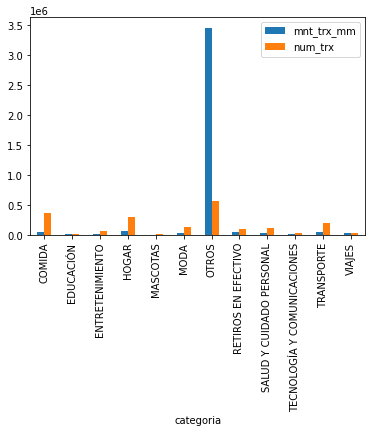

In [50]:
data.groupby('categoria')[['mnt_trx_mm', 'num_trx']].sum().plot.bar()
plt.show()

#### Tipos de documentos utilizados por los clientes
Se puede concluir que la gran mayoría de usuarios utilizan su cédula para realizar transacciones.

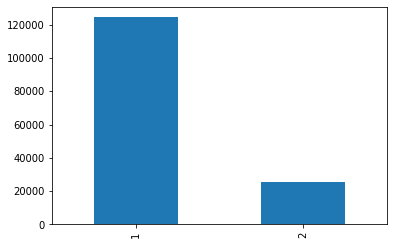

In [52]:
data['tipo_doc'].value_counts().plot.bar()
plt.show()